In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
users = pd.read_csv('users.csv',index_col=0)

In [3]:
percentage = pd.read_csv('percentages15.csv',index_col = 0)

In [4]:
users.describe()

,user_id,section_id,avg_perc,top3_avg_perc,best_perc,nprocs
count,6.806800e+04,68068.000000,68068.000000,68068.000000,68068.000000,68068.000000
mean,3.005437e+06,1.500000,46.542004,58.629998,66.589090,8.632074
std,7.031225e+05,1.118042,23.459158,27.462268,26.682075,5.427198
min,5.013440e+05,0.000000,0.030000,0.030000,0.040000,2.000000
25%,2.819851e+06,0.750000,27.340000,35.390000,45.680000,4.000000
50%,3.109583e+06,1.500000,45.195000,60.970000,72.410000,7.000000
75%,3.325944e+06,2.250000,64.800000,83.490000,90.540000,13.000000
max,2.010193e+07,3.000000,99.960000,100.000000,100.000000,18.000000


In [5]:
# Removing section id 1 and 4 from the table
print(len(users))
users = users[(users['section_id']==3) | (users['section_id']==0)].copy()

68068


In [6]:
users.head()

,user_id,section_id,avg_perc,top3_avg_perc,best_perc,nprocs
2,2745911,3,71.11,82.30,86.48,14
3,2893074,0,22.82,42.69,45.19,13
6,2893074,3,36.09,83.68,91.11,13
7,2532997,0,21.12,28.06,34.25,5
10,2532997,3,24.96,30.21,32.68,5


In [7]:
# Setting user_id as index
users = users.reset_index(drop=True)
users = users.set_index('user_id')
users.head()

,section_id,avg_perc,top3_avg_perc,best_perc,nprocs
user_id,,,,,
2745911,3,71.11,82.30,86.48,14
2893074,0,22.82,42.69,45.19,13
2893074,3,36.09,83.68,91.11,13
2532997,0,21.12,28.06,34.25,5
2532997,3,24.96,30.21,32.68,5


# Analysing pecentage dataset

Each datapoint of Pecentage dataset contains user id, the corresponding question id that they attempted, The level of difficulty(LOD) of that question id, the question set id (a.ae_qset_id), the sequence in which a particular user attempted that question (seq_no), time taken to attempt that question, whether it was attempted or left(attempted), if attempted whether it was attempted correctly or not (correct) and the option marked (MARK_OPT)

In [8]:
# function to return dataframe name as string
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [9]:
# function to plot cluster between two attributes of a dataframe and number of clusters(n) passed as function parameters
#(default attribute--> column 0 and column 1 ) 

def plotcluster(df,col,n=3,col_1=0,col_2=1):
    x = df[col].values 
        
    # feature scaling to normalise the range of independent attributes
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    kmeans = KMeans(n_clusters=n)
    X=x_scaled
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, col_1], X[:, col_2], c=y_kmeans, s=50, cmap='viridis')
    plt.xlabel(col[col_1])
    plt.ylabel(col[col_2])
    plt.title(get_df_name(df))
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, col_1], centers[:, col_2], c='black', s=200, alpha=0.5);

In [10]:
#Analysing Percentage dataset
percentage.head(10)

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,Y,Y,b
1,Percentages,2942830,111587,19.0,1208003,2,77,Y,Y,d
2,Percentages,2942830,134375,19.2,1208003,3,77,Y,Y,c
3,Percentages,2942830,153983,19.4,1208003,4,162,Y,N,c
4,Percentages,2942830,187875,9.3,1208003,5,29,Y,Y,b
5,Percentages,2942830,243594,19.1,1208003,6,180,Y,N,b
6,Percentages,2942830,245141,9.1,1208003,7,47,Y,Y,d
7,Percentages,3410077,94126,29.2,1208010,1,2,Y,Y,c
8,Percentages,3410077,127305,49.5,1208010,2,12,Y,N,x
9,Percentages,3410077,127349,49.5,1208010,3,55,Y,Y,e


In [11]:
percentage.describe()

,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken
count,3.721200e+04,37212.000000,37212.000000,3.721200e+04,37212.000000,37212.000000
mean,3.003957e+06,174889.762039,21.729681,1.207999e+06,4.000000,94.602118
std,4.494304e+05,57899.518351,15.482386,6.934957e+00,2.000027,92.009712
min,8.756670e+05,88286.000000,1.000000,1.207989e+06,1.000000,0.000000
25%,2.826998e+06,127305.000000,9.300000,1.207994e+06,2.000000,34.000000
50%,3.107232e+06,153964.000000,19.100000,1.207998e+06,4.000000,69.000000
75%,3.328622e+06,246075.000000,29.100000,1.208005e+06,6.000000,128.000000
max,3.505466e+06,263000.000000,91.800000,1.208015e+06,7.000000,1200.000000


In [12]:
# Finding out total number of unique questions and unique users
number_ques = len(percentage['question_id'].unique())
number_users = len(percentage['user_id'].unique())
number_ques,number_users

(189, 1410)

In [13]:
actual_users = percentage['user_id'].unique()
actual_users

array([2942830, 3410077, 2544656, ..., 3354216, 3119593, 3297418])

In [14]:
percentage.head()      

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,Y,Y,b
1,Percentages,2942830,111587,19.0,1208003,2,77,Y,Y,d
2,Percentages,2942830,134375,19.2,1208003,3,77,Y,Y,c
3,Percentages,2942830,153983,19.4,1208003,4,162,Y,N,c
4,Percentages,2942830,187875,9.3,1208003,5,29,Y,Y,b


### Plotting frequency of  time interval for all datapoints in percentage dataset

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

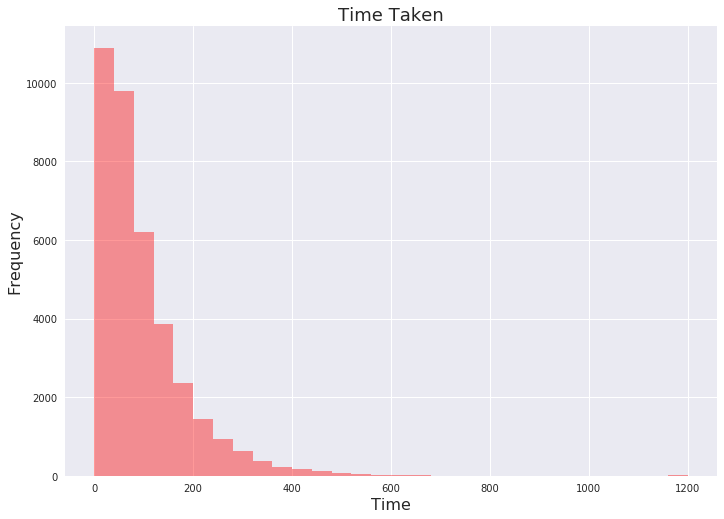

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(percentage['time_taken'], color='red', bins=30,kde = False)
plt.title('Time Taken', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

#### Analysing the histogram for time taken less than 500 sec for a single question attempt

In [16]:
time_less_500  = percentage[percentage['time_taken']<500]
time_less_500.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,Y,Y,b
1,Percentages,2942830,111587,19.0,1208003,2,77,Y,Y,d
2,Percentages,2942830,134375,19.2,1208003,3,77,Y,Y,c
3,Percentages,2942830,153983,19.4,1208003,4,162,Y,N,c
4,Percentages,2942830,187875,9.3,1208003,5,29,Y,Y,b


/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([<matplotlib.axis.XTick at 0x7ff510cf3ba8>,
 <a list of 17 Text xticklabel objects>)

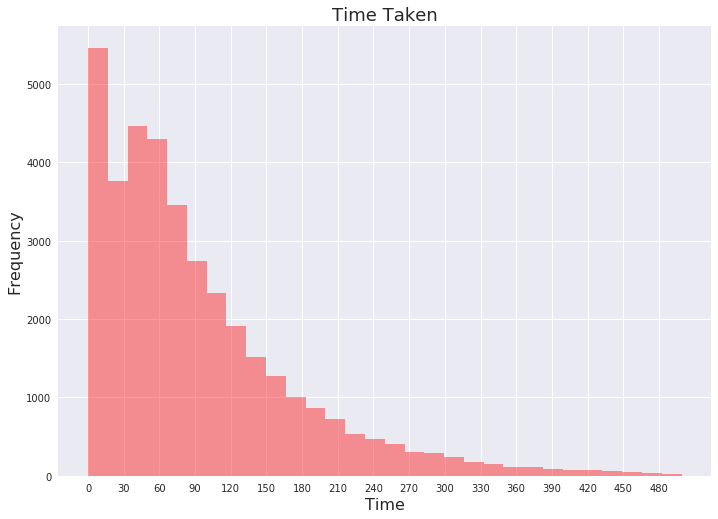

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(time_less_500['time_taken'], color='red', bins=30,kde = False)
plt.title('Time Taken', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(np.arange(0,500,30))

###  Setting Marked option x as not attempted

In [18]:
percentage.loc[percentage['MARK_OPT']=='x','attempted'] = 0
percentage.loc[percentage['MARK_OPT']!='x','attempted'] = 1
percentage.loc[percentage['correct']=='Y','correct'] = 1
percentage.loc[percentage['correct']=='N','correct'] = 0

In [19]:
percentage.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,162,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29,1,1,b


### Grouping the data according to the unique questions 

In [20]:
questions = percentage.groupby('question_id')

In [21]:
questions.first().head()

,MODULE_NAME,user_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
question_id,,,,,,,,,
88286,Percentages,2989722,91.7,1208014,1,79,1,0,a
88287,Percentages,2513357,91.8,1208015,1,7,1,0,a
88292,Percentages,2989722,91.7,1208014,2,75,1,1,b
88293,Percentages,2989722,91.8,1208014,3,5,1,0,c
88303,Percentages,2863632,39.4,1208005,1,84,1,1,a


### Taking mean of individual groups so that attempted accuracy is reflected for each individual questions

In [22]:
attempted_correct = questions.mean()

In [23]:
attempted_correct['attempted_and_correct'] = 0

In [24]:
#finding out the corrected accuracy with respect to attempted questions
attempted_correct['attempted_and_correct'] = attempted_correct['correct']/attempted_correct['attempted']

In [25]:
attempted_correct.head()
attempted_correct.loc[94127]

user_id                  2.951542e+06
LOD                      1.910000e+01
a.ae_qset_id             1.208003e+06
seq_no                   1.000000e+00
time_taken               9.141667e+01
attempted                9.947917e-01
correct                  9.114583e-01
attempted_and_correct    9.162304e-01
Name: 94127, dtype: float64

### Visualising the relation between accuracy and time time taken wrt each question for complete dataset

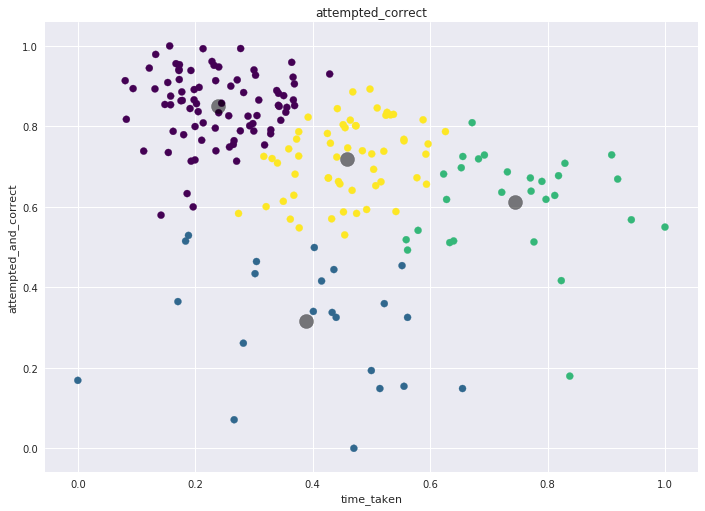

In [26]:
plotcluster(attempted_correct,['time_taken','attempted_and_correct'],4)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([<matplotlib.axis.XTick at 0x7ff50d2a4ef0>,
 <a list of 10 Text xticklabel objects>)

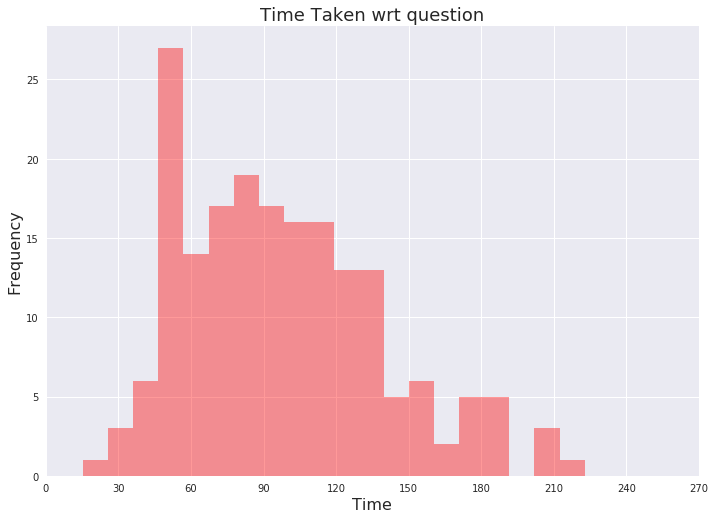

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(attempted_correct['time_taken'], color='red', bins=20,kde = False)
plt.title('Time Taken wrt question', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(np.arange(0,300,30))

### Grouping percentage by users and merging it with users dataset

In [28]:
users.head()

,section_id,avg_perc,top3_avg_perc,best_perc,nprocs
user_id,,,,,
2745911,3,71.11,82.30,86.48,14
2893074,0,22.82,42.69,45.19,13
2893074,3,36.09,83.68,91.11,13
2532997,0,21.12,28.06,34.25,5
2532997,3,24.96,30.21,32.68,5


In [29]:
#segregating users on the basis of their top3 average percentile
above90_users = users[users['top3_avg_perc']>90]
between70_and_90users = users[(users['top3_avg_perc']>70) & (users['top3_avg_perc']<90)]
len(above90_users),len(between70_and_90users)

(4957, 7600)

In [30]:
lis = above90_users.index
lus = between70_and_90users.index
lis = lis.tolist()
lus = lus.tolist()
len(lis),len(lus)

(4957, 7600)

In [31]:
#above_90_user_data = percentage[percentage['user_id'].isin(lis)]
above_90_user_data = pd.read_csv("above_90_user_data.csv",index_col = 0)
above_90_user_data.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
8,Percentages,3410077,127305,49.5,1208010,2,12,0,0,x
9,Percentages,3410077,127349,49.5,1208010,3,55,1,1,e
18,Percentages,3266794,94131,19.2,1208000,1,104,1,1,c
19,Percentages,3266794,102067,9.3,1208000,2,111,1,1,c
20,Percentages,3266794,121656,9.2,1208000,3,56,1,1,c


In [32]:
#between70_and_90users = percentage[percentage['user_id'].isin(lus)]
between70_and_90users = pd.read_csv("between70_and_90users.csv",index_col=0)
between70_and_90users.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,162,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29,1,1,b


In [33]:
above_90_user_data = above_90_user_data.groupby('question_id').mean()
above_90_user_data.head()

,user_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct
question_id,,,,,,,
88286,2.938885e+06,91.7,1208014.0,1.0,291.666667,1.000000,0.333333
88287,2.938885e+06,91.8,1208015.0,1.0,241.333333,0.666667,0.333333
88292,2.896802e+06,91.7,1208014.0,2.0,313.666667,0.666667,0.000000
88293,2.656994e+06,91.8,1208014.0,3.0,25.500000,0.500000,0.000000
88303,3.141134e+06,39.4,1208005.0,1.0,94.560000,1.000000,0.920000


In [34]:
#finding out the correctness accuracy of each question with respect to above 90 percentile users data 
above_90_user_data['attempted_and_correct']   = above_90_user_data['correct']/above_90_user_data['attempted']
above_90_user_data  = above_90_user_data.fillna(0)
above_90_user_data.head()

,user_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,attempted_and_correct
question_id,,,,,,,,
88286,2.938885e+06,91.7,1208014.0,1.0,291.666667,1.000000,0.333333,0.333333
88287,2.938885e+06,91.8,1208015.0,1.0,241.333333,0.666667,0.333333,0.500000
88292,2.896802e+06,91.7,1208014.0,2.0,313.666667,0.666667,0.000000,0.000000
88293,2.656994e+06,91.8,1208014.0,3.0,25.500000,0.500000,0.000000,0.000000
88303,3.141134e+06,39.4,1208005.0,1.0,94.560000,1.000000,0.920000,0.920000


In [35]:
#finding out the correctness accuracy of each question with respect to above 70 and below 90 percentile users data 
between70_and_90users = between70_and_90users.groupby('question_id').mean()
between70_and_90users['attempted_and_correct'] = between70_and_90users['correct']/between70_and_90users['attempted']
between70_and_90users.head()

,user_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,attempted_and_correct
question_id,,,,,,,,
88286,2.904979e+06,91.7,1208014.0,1.0,125.166667,0.333333,0.166667,0.500000
88287,3.092386e+06,91.8,1208015.0,1.0,113.333333,0.500000,0.166667,0.333333
88292,3.058483e+06,91.7,1208014.0,2.0,90.625000,0.250000,0.125000,0.500000
88293,3.411396e+06,91.8,1208014.0,3.0,71.000000,1.000000,0.000000,0.000000
88303,2.987339e+06,39.4,1208005.0,1.0,136.406250,0.953125,0.593750,0.622951


### Visualising the variation of time taken and correctness accuracy for each questions by users having more than 90 percentile

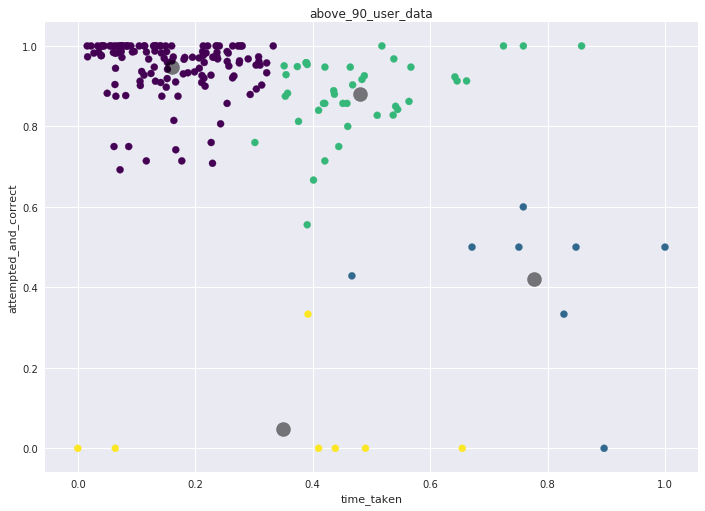

In [36]:
plotcluster(above_90_user_data,['time_taken','attempted_and_correct'],4)

### Visualising the variation of time taken and attempt accuracy for each questions by users having more than 90 percentile

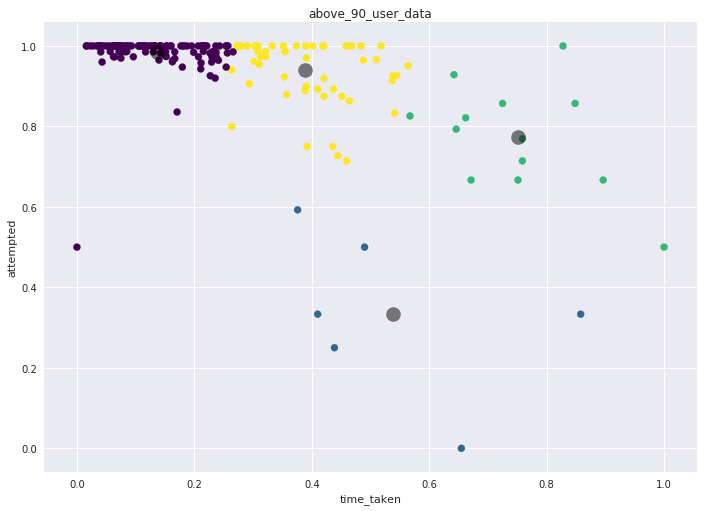

In [37]:
plotcluster(above_90_user_data,['time_taken','attempted'],4)

### Visualising the variation of time taken and attempt accuracy for each questions by users having more than 70 percentile and less than 90 percentile

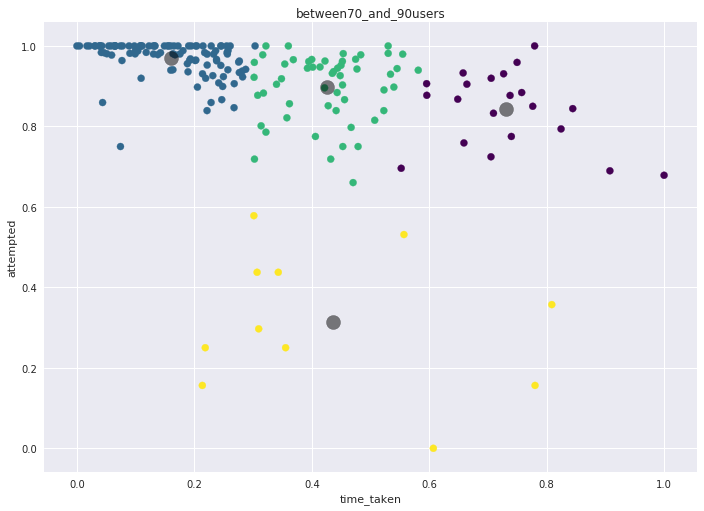

In [38]:
plotcluster(between70_and_90users,['time_taken','attempted'],4)

### Visualising the variation of time taken and correctness accuracy for each questions by users having more than 70 percentile and less than 90 percentile

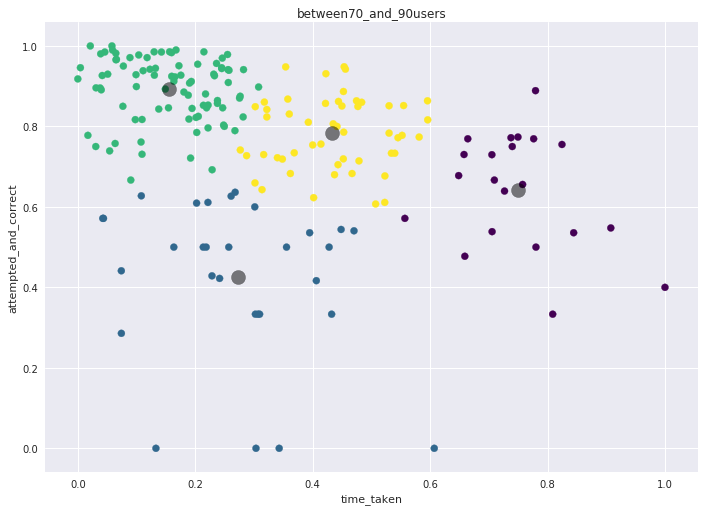

In [39]:
plotcluster(between70_and_90users,['time_taken','attempted_and_correct'],4)

### Bar graph of time taken vs each individual questions

<Figure size 14400x21600 with 0 Axes>

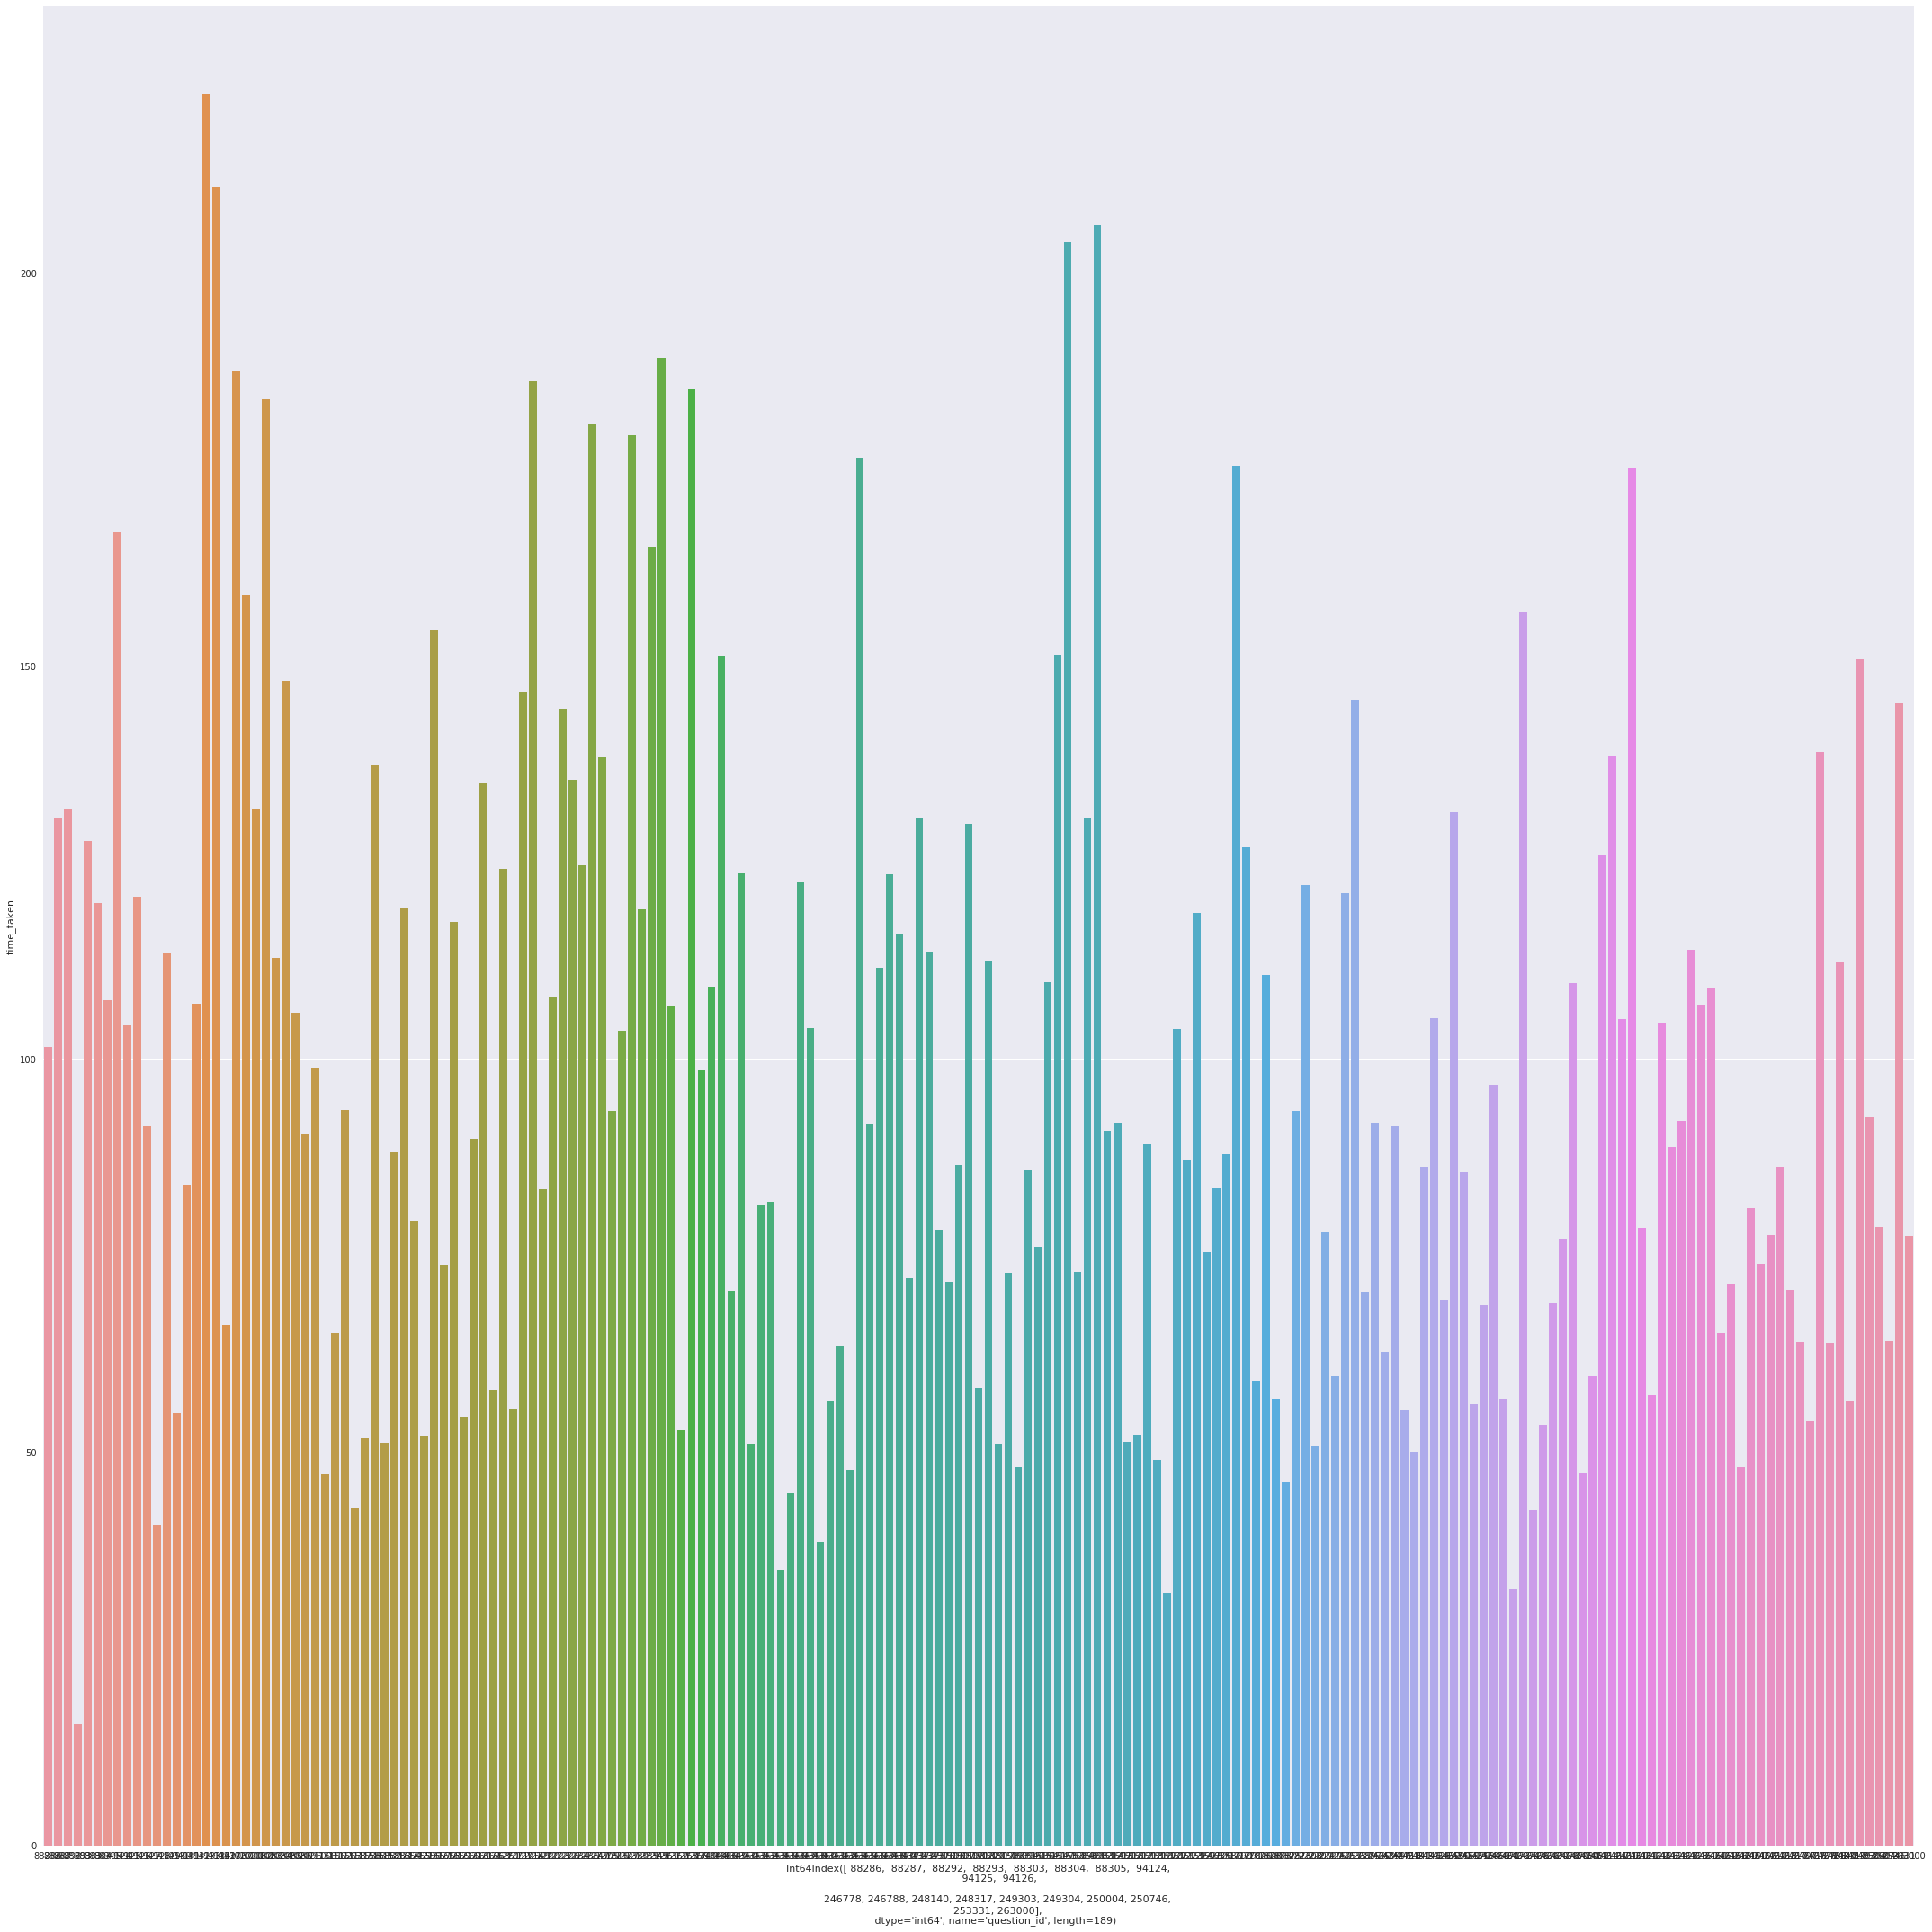

In [40]:
plt.figure(figsize=(200,300))
g = sns.factorplot(x=attempted_correct.index, y="time_taken", data=attempted_correct, size=30, kind="bar")

## Simultaneous comparison of attributes

In [41]:
def simultaneousplot(df):
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(df)
    dataframe = pd.DataFrame(x_scaled, columns=df.columns)
    dataframe = dataframe[['LOD','time_taken','attempted','correct','attempted_and_correct']]
    dataframe['time_taken'] = dataframe['time_taken']*2
    dataframe['LOD'] = (dataframe['LOD']*2)+2
    dataframe['attempted'] = (dataframe['attempted']*2)+4
    dataframe['correct'] = (dataframe['correct']*2)+6
    dataframe['attempted_and_correct'] = (dataframe['attempted_and_correct']*2)+8
    lines = dataframe.plot.line(figsize=(20,15),title = 'Simultaneous comparison of attributes wrt a question for '+str(get_df_name(df)))

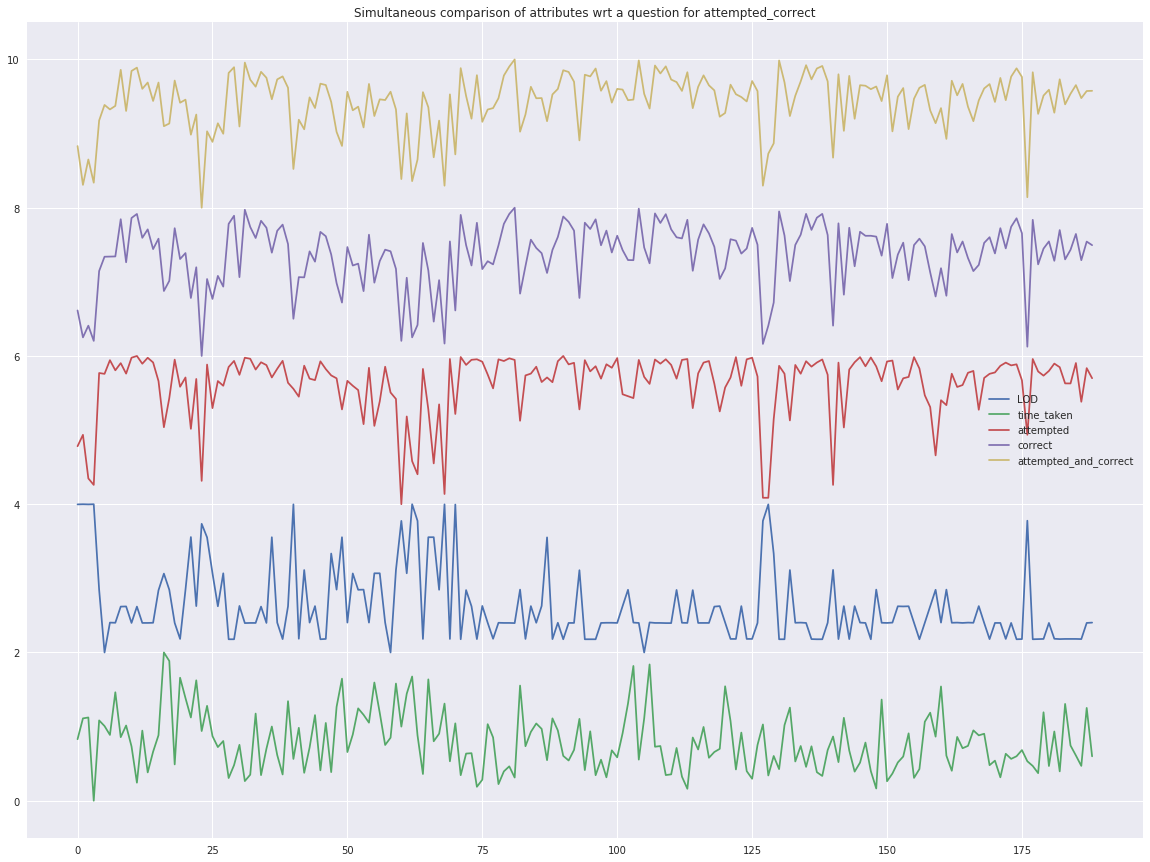

In [42]:
all_users = attempted_correct
simultaneousplot(all_users)

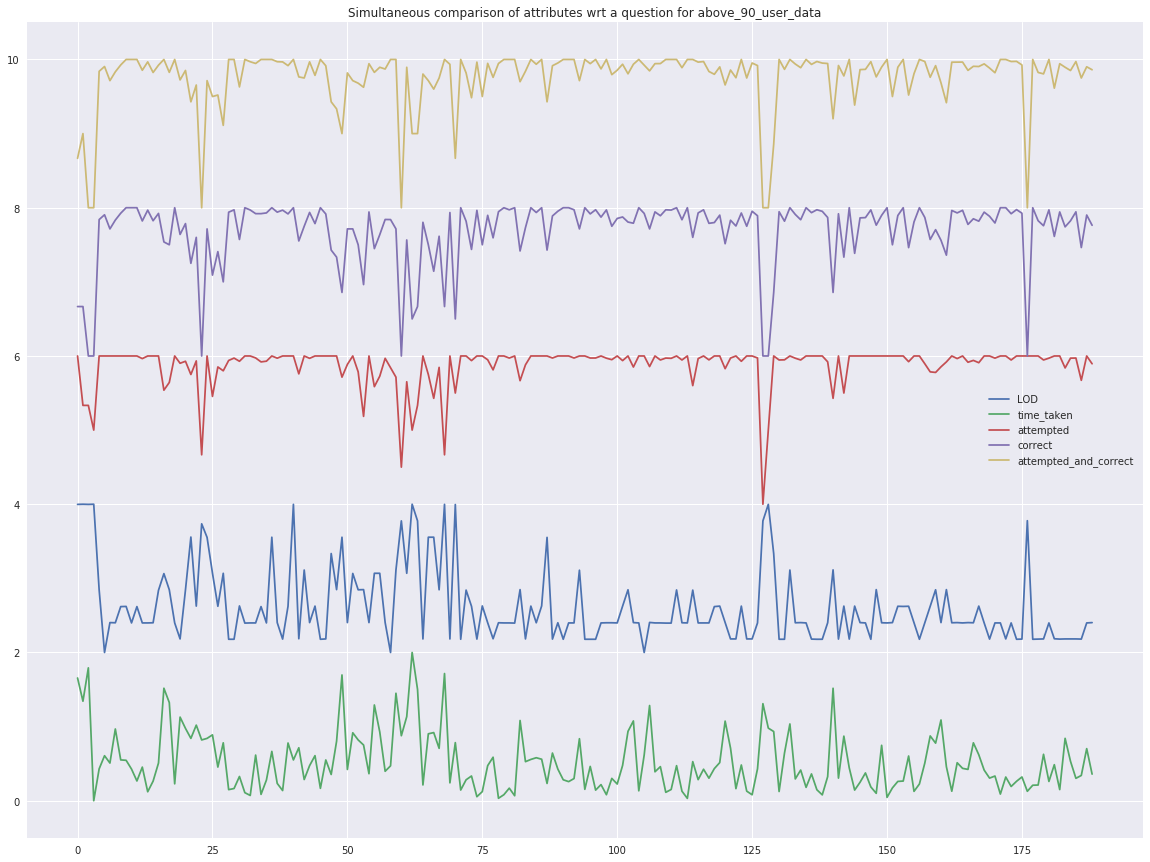

In [43]:
simultaneousplot(above_90_user_data)

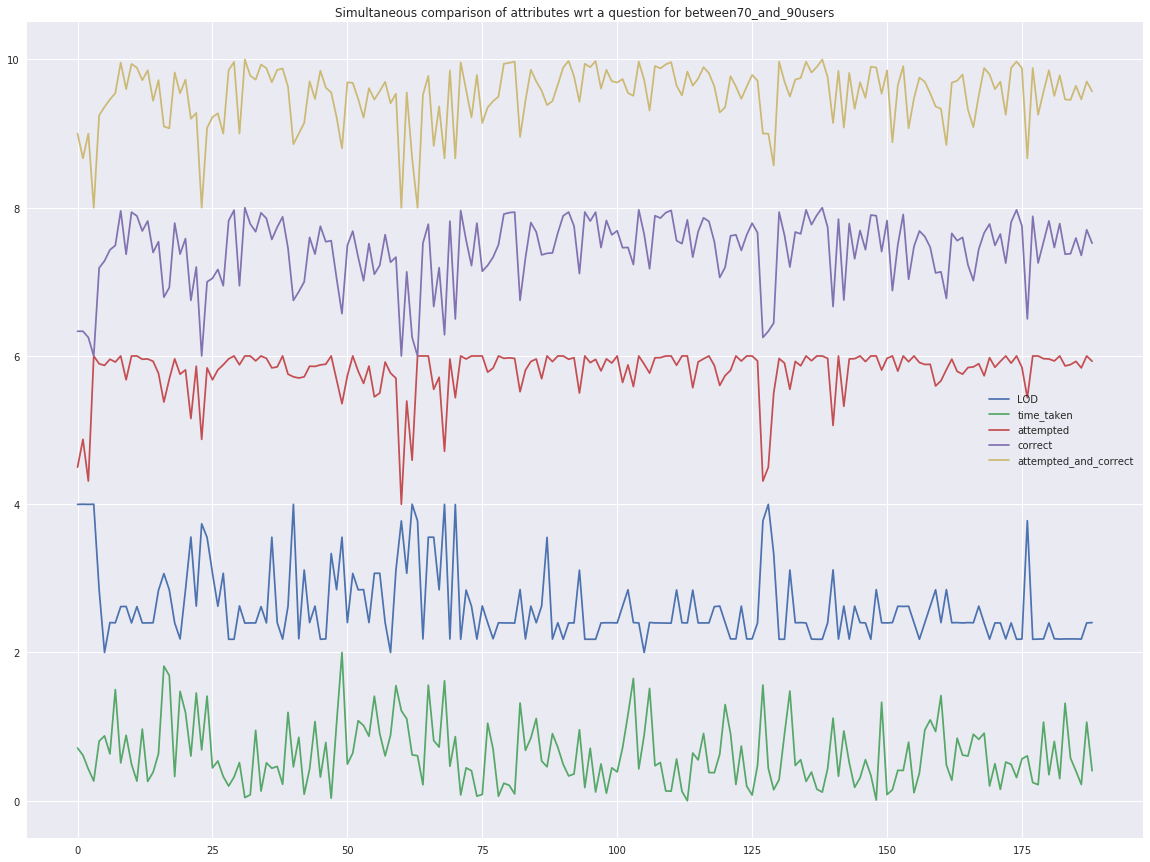

In [44]:
simultaneousplot(between70_and_90users)

### Reducing the dimensions and viewing overall clustering data

In [45]:
def plot_data_pca(df,features,n=3,col_1 = 0,col_2 = 1):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    print(len(df))
    x = df.loc[:, features].values
    y = df.index.values
    x = StandardScaler().fit_transform(x)
    x = pca.fit_transform(x)
    df_tr_std = x
    x = df_tr_std 
    kmeans = KMeans(n_clusters=n)
    X=df_tr_std
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, col_1], X[:, col_2], c=y_kmeans, s=50, cmap='viridis')
    plt.title(get_df_name(df))
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, col_1], centers[:, col_2], c='black', s=200, alpha=0.5);
    return pca.explained_variance_ratio_

189


array([0.69432484, 0.2034069 ])

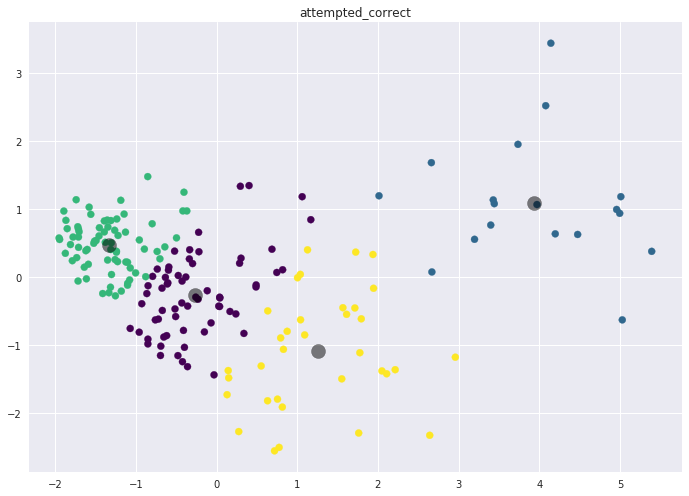

In [46]:
plot_data_pca(attempted_correct,['LOD','time_taken','attempted_and_correct','attempted'],4)

189


array([0.69939312, 0.15271632])

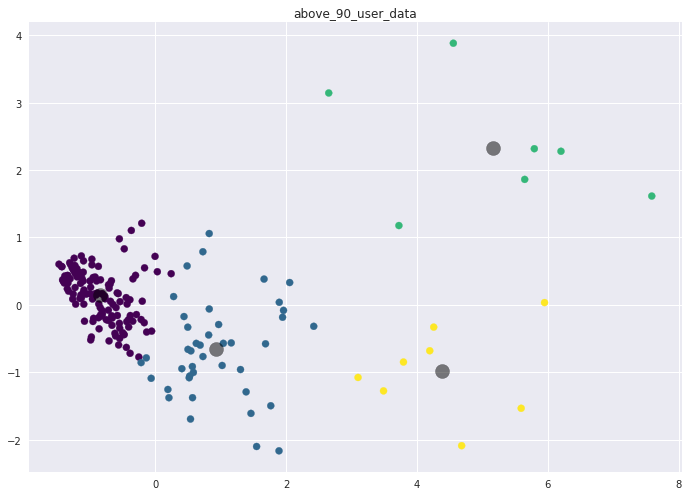

In [47]:
plot_data_pca(above_90_user_data,['LOD','time_taken','attempted_and_correct','attempted'],4)

189


array([0.63713599, 0.20169021])

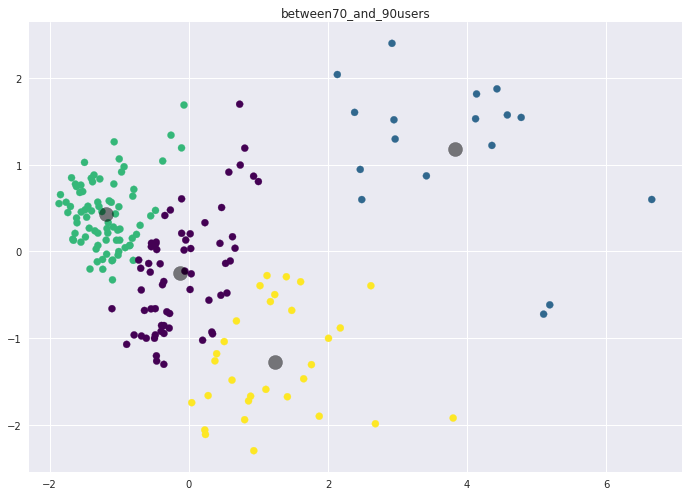

In [48]:
plot_data_pca(between70_and_90users,['LOD','time_taken','attempted_and_correct','attempted'],4)

## Analysing data wrt time and trying to remove the outliers

In [49]:
percentage.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,162,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29,1,1,b


### Creating an empty DataFrame to be filled later with mean values and adjusted mean values
Adjusted mean values corresponds to mean values in the interquartile range (between 25 percentile and 75 percentile) to get an analysing cohort for each individual question and analysing which time parameter is more reliable to take into account in our model. Here corrected mean time represents only the datapoints for which that particular question was attempted correctly. Similar is the case for attempted mean time. 

In [50]:
u = percentage['question_id'].unique()
df = pd.DataFrame(index = u)
df['mean_time'] = 0
df['adjusted_mean_time'] = 0
df['attempted_mean_time'] = 0;
df['attempted_adjusted_mean_time'] = 0
df['not_attempted_mean_time'] = 0
df['not_attempted_adjusted_mean_time'] = 0
df['correct_mean_time'] = 0
df['correct_adjusted_mean_time'] = 0
df['not_correct_mean_time'] = 0
df['not_correct_adjusted_mean_time'] = 0
df.head()

,mean_time,adjusted_mean_time,attempted_mean_time,attempted_adjusted_mean_time,not_attempted_mean_time,not_attempted_adjusted_mean_time,correct_mean_time,correct_adjusted_mean_time,not_correct_mean_time,not_correct_adjusted_mean_time
94127,0,0,0,0,0,0,0,0,0,0
111587,0,0,0,0,0,0,0,0,0,0
134375,0,0,0,0,0,0,0,0,0,0
153983,0,0,0,0,0,0,0,0,0,0
187875,0,0,0,0,0,0,0,0,0,0


In [51]:
p = percentage.groupby('question_id')
for index,group in p:
    #Iterating over each question group
    m = p.get_group(index)
    #Finding out the total mean time taken to solve the question
    mean_time = m['time_taken'].mean() 
    df.loc[index]['mean_time'] = mean_time
    val = m['time_taken'].values
    #finding out the interquartile range
    total_per_25 = np.percentile(val,25)
    total_per_75 = np.percentile(val,75)
    #taking mean time for interquartile range
    adj_mean = m[(m['time_taken']>total_per_25) & (m['time_taken']<total_per_75)]
    df.loc[index]['adjusted_mean_time'] = adj_mean['time_taken'].mean()
    

    #Repeating the above process for datapoints corresponding to positive attempts
    att_mean = m[m['attempted']==1]
    if(len(att_mean)>0):
        df.loc[index]['attempted_mean_time'] = att_mean['time_taken'].mean()
        att_per_25 = np.percentile(att_mean['time_taken'].values,25)
        att_per_75 = np.percentile(att_mean['time_taken'].values,75)
        att_adj_mean = att_mean[(att_mean['time_taken']>att_per_25) & (att_mean['time_taken']<att_per_75)]
        df.loc[index]['attempted_adjusted_mean_time'] = att_adj_mean['time_taken'].mean()
    
    #Repeating the above process for datapoints corresponding to negative attempts
    not_att_mean = m[m['attempted']==0]
    if(len(not_att_mean)>0):
        df.loc[index]['not_attempted_mean_time'] = not_att_mean['time_taken'].mean()
        not_att_per_25 = np.percentile(not_att_mean['time_taken'].values,25)
        not_att_per_75 = np.percentile(not_att_mean['time_taken'].values,75)
        not_att_adj_mean = not_att_mean[(not_att_mean['time_taken']>not_att_per_25) & (not_att_mean['time_taken']<not_att_per_75)]
        df.loc[index]['not_attempted_adjusted_mean_time'] = not_att_adj_mean['time_taken'].mean()
        
    
    #Repeating the above process for datapoints corresponding to positive and correct attempts
    corr_mean = m[m['correct']==1]
    if(len(corr_mean)>0):
        df.loc[index]['correct_mean_time'] = corr_mean['time_taken'].mean()
        corr_per_25 = np.percentile(corr_mean['time_taken'].values,25)
        corr_per_75 = np.percentile(corr_mean['time_taken'].values,75)
        corr_adj_mean = corr_mean[(corr_mean['time_taken']>corr_per_25) & (corr_mean['time_taken']<corr_per_75)]
        df.loc[index]['correct_adjusted_mean_time'] = corr_adj_mean['time_taken'].mean()


    #Repeating the above process for datapoints corresponding to positive and incorrect attempts
    not_corr_mean = m[m['correct']==0]
    if(len(not_corr_mean)>0):
        df.loc[index]['not_correct_mean_time'] = not_corr_mean['time_taken'].mean()
        not_corr_per_25 = np.percentile(not_corr_mean['time_taken'].values,25)
        not_corr_per_75 = np.percentile(not_corr_mean['time_taken'].values,75)
        not_corr_adj_mean = not_corr_mean[(not_corr_mean['time_taken']>not_corr_per_25) & (not_corr_mean['time_taken']<not_corr_per_75)]
        df.loc[index]['not_correct_adjusted_mean_time'] = not_corr_adj_mean['time_taken'].mean()

In [52]:
len(att_mean),len(not_att_mean)

(366, 26)

In [53]:
df.head()

,mean_time,adjusted_mean_time,attempted_mean_time,attempted_adjusted_mean_time,not_attempted_mean_time,not_attempted_adjusted_mean_time,correct_mean_time,correct_adjusted_mean_time,not_correct_mean_time,not_correct_adjusted_mean_time
94127,91,77,91,77,74,0,90,77,101,69
111587,42,39,43,40,10,0,44,40,8,0
134375,113,99,114,99,30,4,108,93,132,122
153983,206,198,208,200,180,171,206,191,204,207
187875,46,38,46,38,4,0,44,36,58,47


### Visualising the effect of interquartile range for a random datapoint/question

In [54]:
sample = p.get_group(111587)

In [55]:
s = sample.reset_index(drop = True)
s.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
1,Percentages,3311494,111587,19.0,1208003,2,82,1,1,d
2,Percentages,3300325,111587,19.0,1208003,2,41,1,1,d
3,Percentages,3410170,111587,19.0,1208003,2,40,1,1,d
4,Percentages,2820682,111587,19.0,1208003,2,45,1,1,d


In [56]:
 r = df.loc[111587]

In [57]:
len(s)

192

### Analysing the plot for total mean time and the effect of interquartile range for a random question

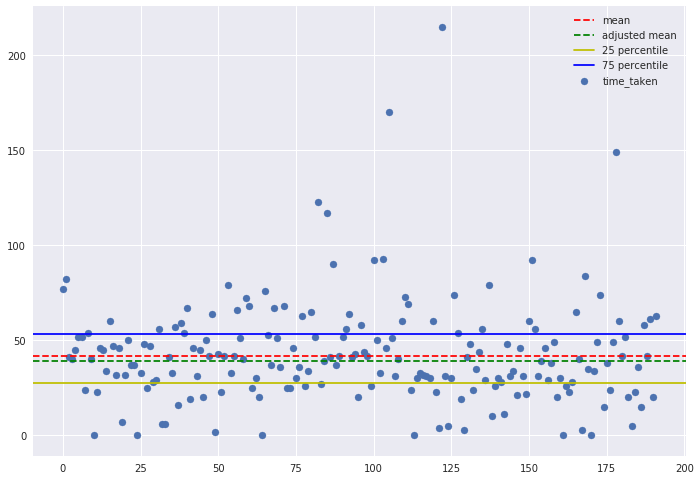

In [58]:
y = plt.scatter(s.index,s['time_taken'])
plt.axhline(y=r['mean_time'], color='r', linestyle='--',label = "mean")
plt.axhline(y=r['adjusted_mean_time'], color='g', linestyle='--',label = "adjusted mean")
plt.axhline(y = np.percentile(s['time_taken'],25), color = 'y',linestyle = '-',label = "25 percentile")
plt.axhline(y = np.percentile(s['time_taken'],75), color = 'b',linestyle = '-',label = "75 percentile")
plt.legend()

### Analysing the plot for total mean time for correct attempts and the effect of interquartile range for a random question

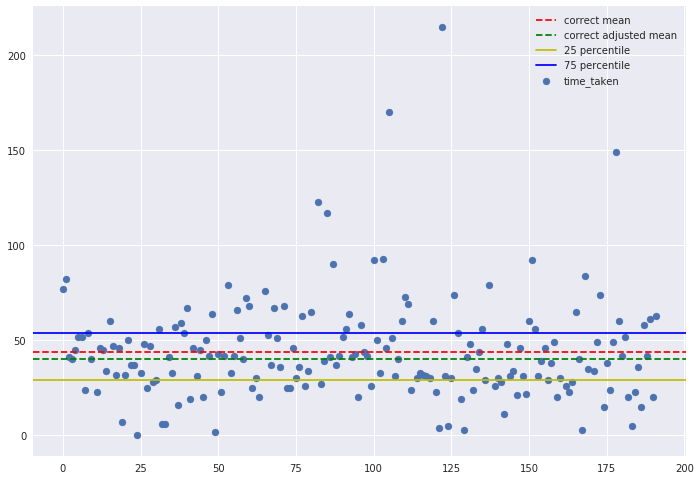

In [59]:
y = plt.scatter(s[s['correct']==1].index,s[s['correct']==1]['time_taken'])
plt.axhline(y=r['correct_mean_time'], color='r', linestyle='--',label = "correct mean")
plt.axhline(y=r['correct_adjusted_mean_time'], color='g', linestyle='--',label = "correct adjusted mean")
plt.axhline(y = np.percentile(s[s['correct']==1]['time_taken'],25), color = 'y',linestyle = '-',label = "25 percentile")
plt.axhline(y = np.percentile(s[s['correct']==1]['time_taken'],75), color = 'b',linestyle = '-',label = "75 percentile")
plt.legend()

## Analysing newly analysed time with already presented attributes

In [60]:
above_90_user_data.head()

,user_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,attempted_and_correct
question_id,,,,,,,,
88286,2.938885e+06,91.7,1208014.0,1.0,291.666667,1.000000,0.333333,0.333333
88287,2.938885e+06,91.8,1208015.0,1.0,241.333333,0.666667,0.333333,0.500000
88292,2.896802e+06,91.7,1208014.0,2.0,313.666667,0.666667,0.000000,0.000000
88293,2.656994e+06,91.8,1208014.0,3.0,25.500000,0.500000,0.000000,0.000000
88303,3.141134e+06,39.4,1208005.0,1.0,94.560000,1.000000,0.920000,0.920000


In [61]:
len(above_90_user_data)

189

In [62]:
above_90_user_data = above_90_user_data[['LOD','attempted','attempted_and_correct']]
above_90_user_data = above_90_user_data.reset_index()
above_90_user_data.head()

,question_id,LOD,attempted,attempted_and_correct
0,88286,91.7,1.000000,0.333333
1,88287,91.8,0.666667,0.500000
2,88292,91.7,0.666667,0.000000
3,88293,91.8,0.500000,0.000000
4,88303,39.4,1.000000,0.920000


In [63]:
timedf = df.reset_index()
timedf.columns = ['question_id','mean_time','adjusted_mean_time','attempted_mean_time','attempted_adjusted_mean_time','not_attempted_mean_time','not_attempted_adjusted_mean_time','correct_mean_time','correct_adjusted_mean_time','not_correct_mean_time','not_correct_adjusted_mean_time']
timedf.head()

,question_id,mean_time,adjusted_mean_time,attempted_mean_time,attempted_adjusted_mean_time,not_attempted_mean_time,not_attempted_adjusted_mean_time,correct_mean_time,correct_adjusted_mean_time,not_correct_mean_time,not_correct_adjusted_mean_time
0,94127,91,77,91,77,74,0,90,77,101,69
1,111587,42,39,43,40,10,0,44,40,8,0
2,134375,113,99,114,99,30,4,108,93,132,122
3,153983,206,198,208,200,180,171,206,191,204,207
4,187875,46,38,46,38,4,0,44,36,58,47


### Taking adjusted mean time of correct attempts and adjusted mean time of all attempts as a time parameter for questions

In [64]:
timedf = timedf[['question_id','correct_adjusted_mean_time','attempted_adjusted_mean_time']]
timedf.head()

,question_id,correct_adjusted_mean_time,attempted_adjusted_mean_time
0,94127,77,77
1,111587,40,40
2,134375,93,99
3,153983,191,200
4,187875,36,38


### Merging the time dataframe with above 90 percentile users dataframe

In [65]:
finaldf = pd.merge(timedf, above_90_user_data, on='question_id')
finaldf.head()

,question_id,correct_adjusted_mean_time,attempted_adjusted_mean_time,LOD,attempted,attempted_and_correct
0,94127,77,77,19.1,1.000000,1.000000
1,111587,40,40,19.0,1.000000,1.000000
2,134375,93,99,19.2,1.000000,0.976190
3,153983,191,200,19.4,0.928571,0.923077
4,187875,36,38,9.3,1.000000,0.976190


In [66]:
finaldf = finaldf.set_index("question_id")
finaldf.head()

,correct_adjusted_mean_time,attempted_adjusted_mean_time,LOD,attempted,attempted_and_correct
question_id,,,,,
94127,77,77,19.1,1.000000,1.000000
111587,40,40,19.0,1.000000,1.000000
134375,93,99,19.2,1.000000,0.976190
153983,191,200,19.4,0.928571,0.923077
187875,36,38,9.3,1.000000,0.976190


### Segregating the questions into 10 different clusters on the basis of all the attributes with correct adjusted time as time parameter

189


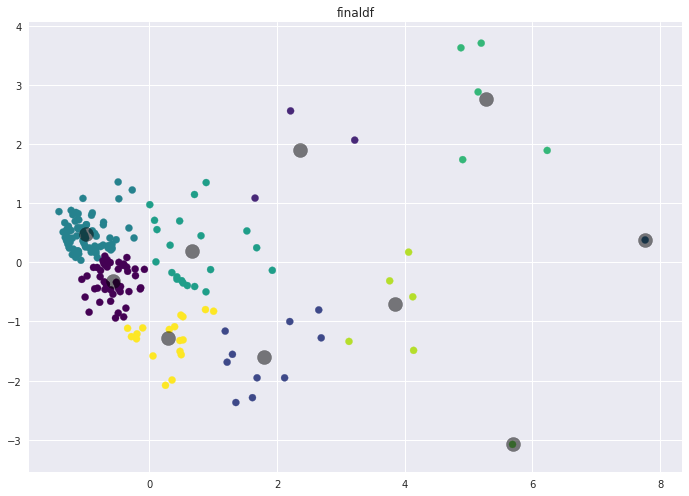

In [67]:
l = plot_data_pca(finaldf,['correct_adjusted_mean_time','LOD','attempted','attempted_and_correct'],n=10)

In [68]:
# Calculating the info loss due to PCA
infoloss = 1 -l[0]-l[1]
infoloss

0.1468537981777784

### Segregating the questions into 10 different clusters on the basis of all the attributes with attempted adjusted time as time parameter

189


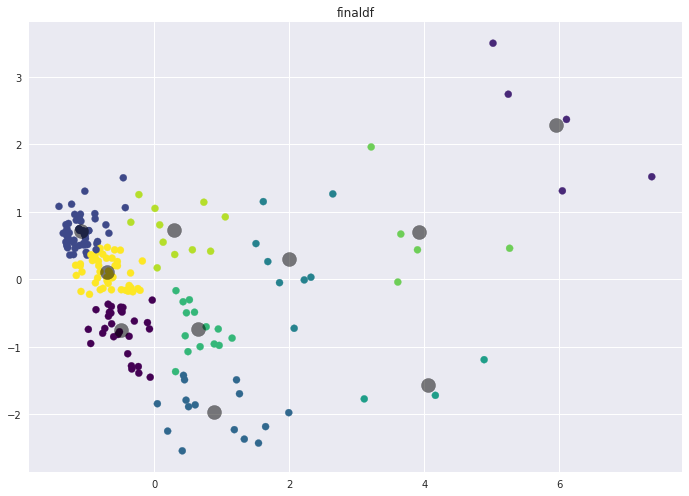

In [69]:
l = plot_data_pca(finaldf,['attempted_adjusted_mean_time','LOD','attempted','attempted_and_correct'],n=10)

In [70]:
infoloss = 1-l[0] - l[1]
infoloss

0.15167148567110725

In [71]:
finaldf.head()

,correct_adjusted_mean_time,attempted_adjusted_mean_time,LOD,attempted,attempted_and_correct
question_id,,,,,
94127,77,77,19.1,1.000000,1.000000
111587,40,40,19.0,1.000000,1.000000
134375,93,99,19.2,1.000000,0.976190
153983,191,200,19.4,0.928571,0.923077
187875,36,38,9.3,1.000000,0.976190


# Correlation Between Users

In [72]:
percentage.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,162,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29,1,1,b


### Scaling time with respect to correct , incorrect and unattempted questions
Scaling time by thousand for correct attempts, negative thousands for incorrect attempts and negative of original time for unattempted questions

In [73]:
temp = percentage.copy()
temp.head()
for index,row in temp.iterrows():
    if(row['attempted']==1):
        if(row['correct']==1):
            temp.loc[index, 'time_taken'] = 1000*row['time_taken']
        else:
            temp.loc[index,'time_taken'] = -1000*row['time_taken']
    else:
        temp.loc[index,'time_taken'] = -row['time_taken']

In [74]:
temp.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96000,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77000,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77000,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,-162000,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29000,1,1,b


### Creating a pivot table for each user id with each question id

In [75]:
pivotTable = temp.pivot_table(index=['question_id'],columns=['user_id'],values='time_taken')

In [76]:
pivotTable.head()

user_id,875667,995813,1010849,1021074,1071700,1113768,1128676,1131078,1137039,1209181,...,3498095,3498692,3498960,3499193,3499986,3501403,3502214,3502333,3502605,3505466
question_id,,,,,,,,,,,,,,,,,,,,,
88286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88303,NaN,NaN,NaN,NaN,NaN,83000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the correlation between users based on minimum of 10 questions to consider from on the basis of scaled time

In [77]:
corrTable = pivotTable.corr()
corrTable.head()

user_id,875667,995813,1010849,1021074,1071700,1113768,1128676,1131078,1137039,1209181,...,3498095,3498692,3498960,3499193,3499986,3501403,3502214,3502333,3502605,3505466
user_id,,,,,,,,,,,,,,,,,,,,,
875667,1.000000,0.612348,NaN,-0.011285,NaN,NaN,-0.493422,NaN,0.685941,0.174363,...,NaN,-0.065300,NaN,NaN,-0.113205,0.205938,NaN,NaN,NaN,0.693209
995813,0.612348,1.000000,NaN,0.154572,NaN,NaN,-0.894340,0.019069,0.097869,0.369242,...,NaN,0.570813,0.594118,NaN,0.242515,-0.028468,-0.097011,0.164488,0.180549,0.244317
1010849,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.536028,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021074,-0.011285,0.154572,NaN,1.000000,NaN,NaN,-0.029158,-0.725299,0.165389,-0.100787,...,NaN,0.174703,0.131590,NaN,0.314957,-0.006830,0.114925,0.372799,-0.308646,0.316122
1071700,NaN,NaN,NaN,NaN,1.0,0.233434,NaN,0.027693,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A function which returns a dataframe that corresponds to similar users to the user provided as the parameter

In [78]:
def similarusers(user_name,corrTable):
    my_corr=corrTable.loc[user_name]
    my_corr=my_corr.dropna()
    my_corr=my_corr.sort_values(ascending=False)
    similarItems =pd.DataFrame(my_corr)
    similarItems.reset_index(inplace=True)
    similarItems.columns=['users','corr']
    return similarItems

In [79]:
s = similarusers(3499193,corrTable)
s.head()

,users,corr
0,3499193,1.000000
1,3271872,0.862770
2,2846304,0.845498
3,3338156,0.787827
4,3322193,0.761932


### Finding out the questions that our user did not attempt but users similar to our users did
These are the questions we are going to put up to our user based on how the user attempts the currently put question and it's level of difficulty

In [80]:
p = percentage.groupby('user_id')
# ques will contain all the questions attempted by users similar to our user
ques = set()
for i in range(1,min(6,len(s))):
    x = p.get_group((s.iloc[i]['users']))
    m = set(x['question_id'].values)
    ques = ques.union(m,ques) 
# user_ques will contain all the questions attempted by our users    
user_ques = set(p.get_group(3499193)['question_id'].values)

In [81]:
#diff contains questions not attempted by our user but attempted by users similar to our user
diff = ques - user_ques

In [82]:
ques_df = finaldf[['correct_adjusted_mean_time','LOD','attempted','attempted_and_correct']]

In [83]:
ques_df.head()

,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
question_id,,,,
94127,77,19.1,1.000000,1.000000
111587,40,19.0,1.000000,1.000000
134375,93,19.2,1.000000,0.976190
153983,191,19.4,0.928571,0.923077
187875,36,9.3,1.000000,0.976190


In [84]:
ques_df = ques_df.reset_index()
ques_df.head()

,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
0,94127,77,19.1,1.000000,1.000000
1,111587,40,19.0,1.000000,1.000000
2,134375,93,19.2,1.000000,0.976190
3,153983,191,19.4,0.928571,0.923077
4,187875,36,9.3,1.000000,0.976190


# Adaptive Question Recommendor  

### Recreating dataset for users have more than 90 percentile

In [85]:
above_90_user_data = percentage[percentage['user_id'].isin(lis)]
above_90_user_data.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
39,Percentages,2438207,94128,29.1,1208009,1,4,1,1,d
40,Percentages,2438207,94134,39.4,1208009,2,215,1,1,a
41,Percentages,2438207,102083,29.4,1208009,3,184,1,1,c
42,Percentages,2438207,134353,29.3,1208009,4,46,1,1,b
43,Percentages,2438207,134356,29.5,1208009,5,33,1,0,c


### Recreating dataset for users have more than 70 percentile and less than 90 percentile

In [86]:
between70_and_90users = percentage[percentage['user_id'].isin(lus)]
between70_and_90users.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,162,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29,1,1,b


In [87]:
percentage.head()

,MODULE_NAME,user_id,question_id,LOD,a.ae_qset_id,seq_no,time_taken,attempted,correct,MARK_OPT
0,Percentages,2942830,94127,19.1,1208003,1,96,1,1,b
1,Percentages,2942830,111587,19.0,1208003,2,77,1,1,d
2,Percentages,2942830,134375,19.2,1208003,3,77,1,1,c
3,Percentages,2942830,153983,19.4,1208003,4,162,1,0,c
4,Percentages,2942830,187875,9.3,1208003,5,29,1,1,b


### Function that returns list of similar questions to our passed parameter using Eucledian distances

In [88]:
from sklearn.metrics import pairwise_distances
def similarques(ques_id,ques_df,number_of_ques):
    x = ques_df.loc[:,].values
    y = ques_df.index.values
    x = StandardScaler().fit_transform(x)
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(x)
    dist_mat = pairwise_distances(x)
    ques_idx = ques_df[ques_df['question_id']==ques_id].index[0]
    num = np.arange(0,189)
    new = [x for _,x in sorted(zip(dist_mat[ques_idx],num))]
    ques_id = []
    for i in range(1,number_of_ques+1):
        ques_id.append((int)(ques_df.iloc[new[i]]['question_id']))
    return ques_id
    

In [89]:
similarques(94127,ques_df,5)

[94131, 94137, 94125, 121661, 115883]

## Functions that compare the attributes of questions passed as the parameter

1st subplot is frequency vs time plot , 2nd plot is median time taken by different categories of user to solve that question , 3rd plot is the accuracy pie chart of that corresponding questions. Same plots repeat for question 2

In [90]:
def compare(ques_1,ques_2,percentage,above_90_user_data,between70_and_90users):
    fig, axes = plt.subplots(nrows=2, ncols=3)
    plt.rcParams["figure.figsize"] = [16,9]
    temp1 = percentage.groupby('question_id').get_group(ques_1)
    temp2 = percentage.groupby('question_id').get_group(ques_2)

    per_25 = np.percentile(temp1['time_taken'].values,25)
    per_75 = np.percentile(temp1['time_taken'].values,75)
    temp1 = temp1[(temp1['time_taken']>per_25) & (temp1['time_taken']<per_75)]


    plt.subplot(2, 3, 1)
    n, bins, patches = plt.hist(x=temp1['time_taken'], bins='auto', color='red')
    plt.ylabel('Frequency')
    plt.xlabel('Time')

    
    per_25 = np.percentile(temp2['time_taken'].values,25)
    per_75 = np.percentile(temp2['time_taken'].values,75)
    temp2 = temp2[(temp2['time_taken']>per_25) & (temp2['time_taken']<per_75)]
    
    
    plt.subplot(2, 3, 4)
    n, bins, patches = plt.hist(x=temp2['time_taken'], bins='auto', color='blue')
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    l1 = len(above_90_user_data.groupby('question_id').get_group(ques_1)['correct']==1)
    plt.subplot(2,3,3)
    plt.pie([above_90_user_data.groupby('question_id').get_group(ques_1)['correct'].sum(),l1-above_90_user_data.groupby('question_id').get_group(ques_1)['correct'].sum()],explode=[0.1,0],colors=['green','red'],labels=["Correct","Incorrect"])
    prev = []
    a = percentage.groupby('question_id').get_group(ques_1)['time_taken'].median()
    b = above_90_user_data.groupby('question_id').get_group(ques_1)['time_taken'].median()
    c = between70_and_90users.groupby('question_id').get_group(ques_1)['time_taken'].median()
    prev = [a,b,c]
    a = percentage.groupby('question_id').get_group(ques_2)['time_taken'].median()
    b = above_90_user_data.groupby('question_id').get_group(ques_2)['time_taken'].median()
    c = between70_and_90users.groupby('question_id').get_group(ques_2)['time_taken'].median()
    curr = [a,b,c]
    plt.subplot(2,3,2)
    Students = ["All Students","Above 90%","B/w 70% and 90%"]
    y_pos = np.arange(len(Students))
    plt.bar(y_pos, prev, align='center', alpha=0.5,color = 'red')
    plt.xticks(y_pos, Students)
    plt.ylabel('Time')
    plt.subplot(2, 3, 5)
    plt.bar(y_pos, curr, align='center', alpha=0.5,color = 'blue')
    plt.xticks(y_pos, Students)
    plt.ylabel('Time') 
    l2 = len(above_90_user_data.groupby('question_id').get_group(ques_2)['correct']==1)
    plt.subplot(2,3,6)
    plt.pie([above_90_user_data.groupby('question_id').get_group(ques_2)['correct'].sum(),l2-above_90_user_data.groupby('question_id').get_group(ques_2)['correct'].sum()],explode=[0.1,0],colors=['green','red'],labels=["Correct","Incorrect"])


    

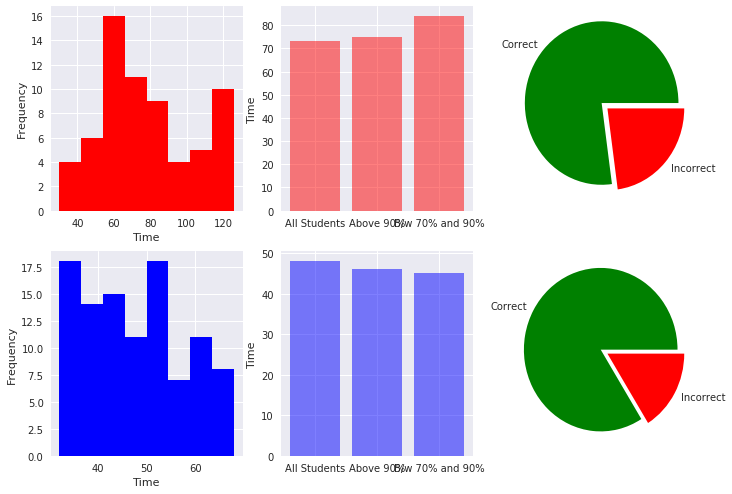

In [91]:
compare(163586,127363,percentage,above_90_user_data,between70_and_90users)

## Final function to recommend questions to user on the basis of whether he attempted the question correctly or not

This function recommends a question from a more difficult cluster if the user attempts it correctly or recommends the most similar question to the question which he attempted incorrectly

In [100]:
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial import distance 
def user(user_id,corrTable,finaldf,percentage,above_90_user_data,between70_and_90users):
    # finding out the similar users to our user
    s = similarusers(user_id,corrTable)
    p = percentage.groupby('user_id')
    ques = set()
    for i in range(1,min(6,len(s))):
        x = p.get_group((s.iloc[i]['users']))
        m = set(x['question_id'].values)
        ques = ques.union(m,ques) 
        user_ques = set(p.get_group(user_id)['question_id'].values)
    # Diff contains questions not attempted by our users but questions attempted by similar users.    
    diff = ques - user_ques
    ques_df = finaldf[['correct_adjusted_mean_time','LOD','attempted','attempted_and_correct']]
    x = ques_df.loc[:,].values
    y = ques_df.index.values
    # clustering the questions on the basis of above attributes as already seen above
    x = StandardScaler().fit_transform(x)
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(x)
    
    ques_df = ques_df.reset_index()
    # clus is an empty dictionary which will store all the questions in set Diff based on the cluster
    #number they belong to
    clus = {}
    for i in range(0,10):
        clus[i] = []
    # Finding the datapoints closest to the centroids of cluster so as to sort cluster on the basis of difficulty
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, x)
    acc = []
    for i in range(0,10):
        accuracy = ques_df.iloc[closest[i]]['attempted_and_correct']
        acc.append(accuracy)
    #Sorted the cluster number on the basis of accuracy of question closest to that cluster's centroid    
    new = [x for _,x in sorted(zip(acc,clus.keys()),reverse=True)]
    
    prev_ques = None
    for i in diff:
        idx = ques_df[ques_df['question_id']==i].index[0]
        clus[kmeans.labels_[idx]].append(i)
    plt.ion()
    flag = False
    idx = 0
    # Iterate through each cluster
    for cluster in new:
        curr_idx = idx
        l = clus[cluster]
        #If no questions in cluster, move to next cluster
        if not l:
            continue
        else:
            #For each question in cluster, predict the first question
            for idx in range(0,len(clus[cluster])):
                curr_ques = clus[cluster][0]
                print("Try question number "+ str(curr_ques))
                # add question into attempted list
                user_ques.add(curr_ques)
                #remove question form unattempted list
                clus[cluster].remove(curr_ques)
                ques.remove(curr_ques)
                #If there is a previous question attempted by user, compare the attributes of previous question and current question
                if prev_ques is not None:
                    compare(prev_ques,curr_ques,percentage,above_90_user_data,between70_and_90users)
                    plt.pause(0.01)
                # Set current question as previous question    
                prev_ques = curr_ques
                
                # Sort the questions in the current cluster by the eucledian distance from the current question
                dist = []
                for q in l:
                        idx1 = ques_df[ques_df['question_id']==curr_ques].index[0]
                        idx2 = ques_df[ques_df['question_id']==q].index[0]
                        dst = distance.euclidean(x[idx1], x[idx2])
                        dist.append(dst)
                prev = clus[cluster]
                n = [x for _,x in sorted(zip(dist,prev))]
                clus[cluster] = n        
                
                # Display questions similar to the current question through disp DataFrame
                disp = pd.DataFrame(columns=ques_df.columns)
                for index in range(0,min(len(n),5)):
                    ques_id = clus[cluster][index]
                    i = ques_df[ques_df['question_id']==ques_id].index[0]
                    disp = disp.append(ques_df.loc[i]) 
                print("Similar Questions Dataframe")
                display(disp)
                
        
                is_correct = input()
                # If users attempts it correctly, we break the inner loop and move to next cluster
                if(is_correct=='Y'):
                    print("Nice Job! Here's next question")
                    break
                #Else if user attempts it incorrectly, we continue the loop and predict the most similar question to
                # current question
                elif(is_correct=='N'):
                    print("Oops! Try it again! Here's a similar question")
                    
                #If user wants to end the test
                else:
                    flag = True;
                    break
            if(flag==True):
                    break


Try question number 115882
Similar Questions Dataframe


,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
82,246077.0,43.0,29.3,1.000000,0.947368
117,159217.0,47.0,19.0,0.984127,1.000000
149,134361.0,41.0,19.1,1.000000,1.000000
62,246189.0,41.0,19.1,1.000000,1.000000
1,111587.0,40.0,19.0,1.000000,1.000000


N
Oops! Try it again! Here's a similar question
Try question number 246077


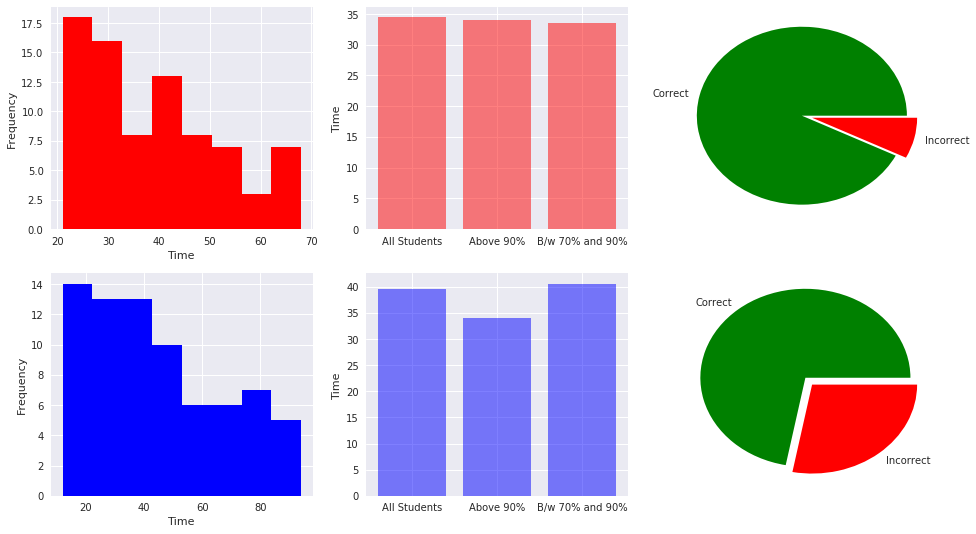

Similar Questions Dataframe


,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
113,94130.0,50.0,19.1,1.000,0.983607
150,150940.0,67.0,19.2,0.975,0.897436
138,246073.0,15.0,39.5,1.000,0.882353
43,134356.0,35.0,29.5,1.000,0.750000
1,111587.0,40.0,19.0,1.000,1.000000


N
Oops! Try it again! Here's a similar question
Try question number 94130


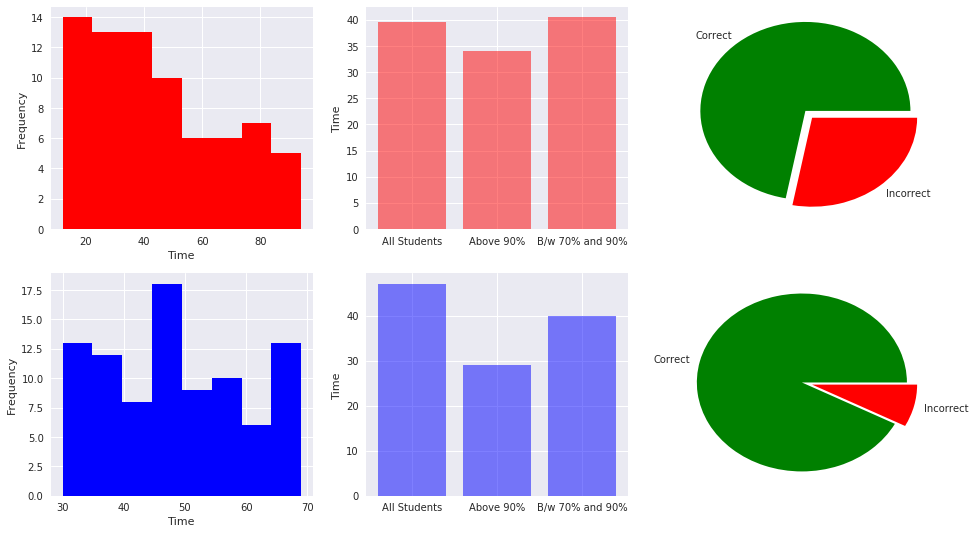

Similar Questions Dataframe


,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
98,94125.0,67.0,29.1,1.000000,0.962963
148,134360.0,30.0,19.2,1.000000,0.972973
117,159217.0,47.0,19.0,0.984127,1.000000
39,94128.0,15.0,29.1,1.000000,1.000000
1,111587.0,40.0,19.0,1.000000,1.000000


Y
Nice Job! Here's next question
Try question number 177828


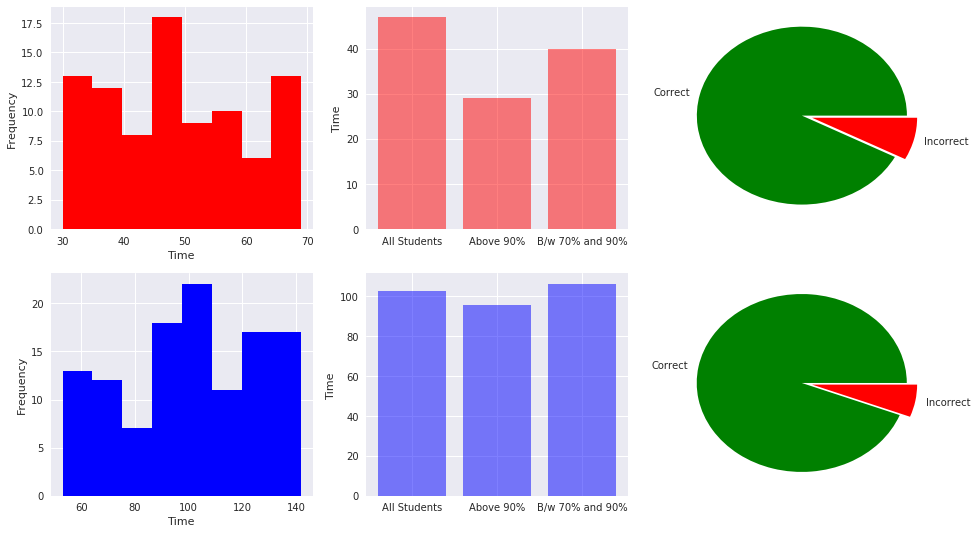

Similar Questions Dataframe


,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
104,246160.0,105.0,29.4,0.954545,0.952381
7,94126.0,99.0,29.2,1.000000,1.000000
158,134370.0,96.0,29.5,1.000000,1.000000
10,134367.0,93.0,29.4,1.000000,1.000000
44,151541.0,80.0,29.4,0.968750,0.967742


Y
Nice Job! Here's next question
Try question number 134365


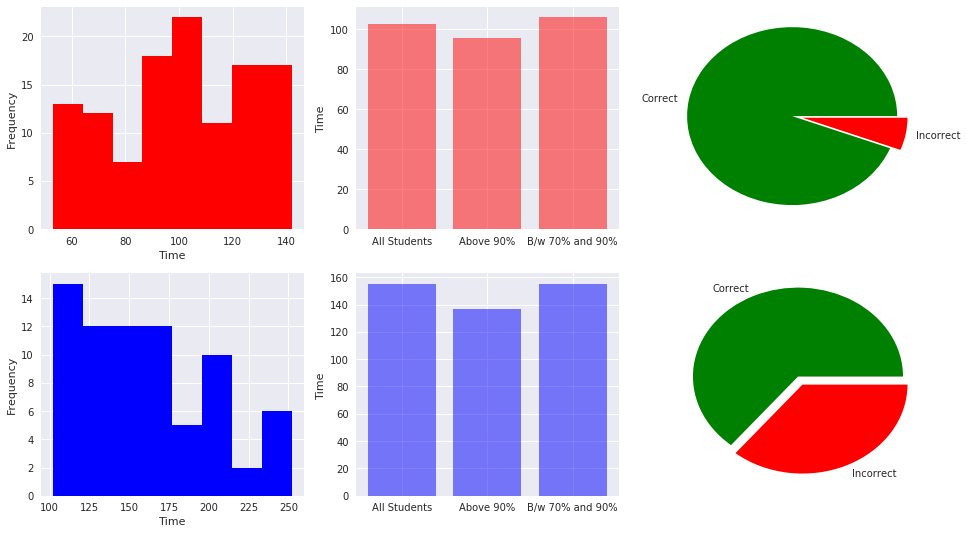

Similar Questions Dataframe


,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
40,94134.0,181.0,39.4,0.821429,0.913043
9,127349.0,172.0,49.5,0.826087,0.947368
8,127305.0,130.0,49.5,0.863636,0.947368
81,245500.0,135.0,29.4,0.750000,0.888889
102,127247.0,198.0,49.5,0.793103,0.913043


Y
Nice Job! Here's next question
Try question number 102085


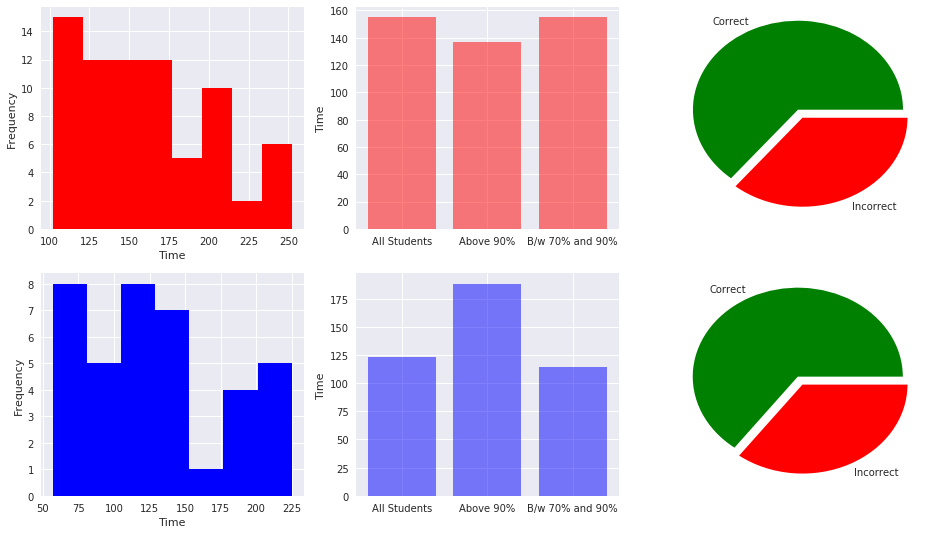

Similar Questions Dataframe


,question_id,correct_adjusted_mean_time,LOD,attempted,attempted_and_correct
186,121654.0,105.0,71.6,1.000000,1.000000
157,127223.0,108.0,49.4,1.000000,0.857143
175,88303.0,92.0,39.4,1.000000,0.920000
183,134371.0,41.0,71.5,1.000000,0.714286
103,134044.0,107.0,39.4,0.923077,0.875000


n


In [101]:
user(3266794,corrTable,finaldf,percentage,above_90_user_data,between70_and_90users)